In [ ]:
!pip install apyori

In [ ]:
!sudo dpkg-reconfigure locales

In [ ]:
import pandas as pd
from datetime import datetime
import locale
import numpy as np
from apyori import apriori
import json
import calendar


# Create Functions

In [ ]:

def converteTurno(x):
    if (x > 0) and (x <= 12):
        return 'Manhã'
    elif (x > 12) and (x <= 18 ):
        return 'Tarde'
    elif (x > 18):
        return'Noite'

def retiraBrancos(x):
    if ('nan' != x and '' != x):
        return x

def myJsonNormalize(data):
  return pd.json_normalize(data,record_path =['items'],meta=['codigo','hora','data','valorTotal','status',['cliente','genero'],['cliente','dataNascimento'],['enderecoEntrega','bairro'],['enderecoEntrega','cidade'],'quantidadeItemUnico',['loja','nome']],errors='ignore',record_prefix='item_')

def week_of_month(date):
    calendar.setfirstweekday(6)
    month = pd.to_datetime(date, format='%Y-%m-%d').month
    year = pd.to_datetime(date, format='%Y-%m-%d').year
    day = pd.to_datetime(date, format='%Y-%m-%d').day
    x = np.array(calendar.monthcalendar(year, month))
    week_of_month = np.where(x==day)[0][0] + 1

    return week_of_month

def listToStringWithoutBrackets(list1):
    ##return str(list1).replace('[\'','').replace('\']','').replace('\'','')
    return str(list1).replace('[','').replace(']','').replace('\'','')


# Select Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data=json.loads(open('/content/drive/MyDrive/Colab Notebooks/Pedidos/pedidos06_2020.json','r').read())
myretaildata06 = myJsonNormalize(data)
data=json.loads(open('/content/drive/MyDrive/Colab Notebooks/Pedidos/pedidos07_2020.json','r').read())
myretaildata07 = myJsonNormalize(data)
data=json.loads(open('/content/drive/MyDrive/Colab Notebooks/Pedidos/pedidos08_2020.json','r').read())
myretaildata08 = myJsonNormalize(data)
data=json.loads(open('/content/drive/MyDrive/Colab Notebooks/Pedidos/pedidos09_2020.json','r').read())
myretaildata09 = myJsonNormalize(data)
data=json.loads(open('/content/drive/MyDrive/Colab Notebooks/Pedidos/pedidos10_2020.json','r').read())
myretaildata10 = myJsonNormalize(data)
data=json.loads(open('/content/drive/MyDrive/Colab Notebooks/Pedidos/pedidos11_2020.json','r').read())
myretaildata11 = myJsonNormalize(data)
data=json.loads(open('/content/drive/MyDrive/Colab Notebooks/Pedidos/pedidos12_2020.json','r').read())
myretaildata12 = myJsonNormalize(data)
data=json.loads(open('/content/drive/MyDrive/Colab Notebooks/Pedidos/pedidos01_2021.json','r').read())
myretaildata01 = myJsonNormalize(data)
data=json.loads(open('/content/drive/MyDrive/Colab Notebooks/Pedidos/pedidos02_2021.json','r').read())
myretaildata02 = myJsonNormalize(data)
data=json.loads(open('/content/drive/MyDrive/Colab Notebooks/Pedidos/pedidos03_2021.json','r').read())
myretaildata03 = myJsonNormalize(data)
data=json.loads(open('/content/drive/MyDrive/Colab Notebooks/Pedidos/pedidos04_2021.json','r').read())
myretaildata04 = myJsonNormalize(data)
data=json.loads(open('/content/drive/MyDrive/Colab Notebooks/Pedidos/pedidos05_2021.json','r').read())
myretaildata05 = myJsonNormalize(data)
data=json.loads(open('/content/drive/MyDrive/Colab Notebooks/Pedidos/pedidos06_2021.json','r').read())
myretaildata0621 = myJsonNormalize(data)
data=json.loads(open('/content/drive/MyDrive/Colab Notebooks/Pedidos/pedidos07_2021.json','r').read())
myretaildata0721 = myJsonNormalize(data)
data=json.loads(open('/content/drive/MyDrive/Colab Notebooks/Pedidos/pedidos08_2021.json','r').read())
myretaildata0821 = myJsonNormalize(data)
data=json.loads(open('/content/drive/MyDrive/Colab Notebooks/Pedidos/pedidos09_2021.json','r').read())
myretaildata0921 = myJsonNormalize(data)
data=json.loads(open('/content/drive/MyDrive/Colab Notebooks/Pedidos/pedidos10_2021.json','r').read())
myretaildata1021 = myJsonNormalize(data)
data=json.loads(open('/content/drive/MyDrive/Colab Notebooks/Pedidos/pedidos11_2021.json','r').read())
myretaildata1121 = myJsonNormalize(data)

## testar se existe se não gera
print(len(myretaildata06.index))
print(len(myretaildata07.index))
print(len(myretaildata08.index))
print(len(myretaildata09.index))
print(len(myretaildata10.index))
print(len(myretaildata11.index))
print(len(myretaildata12.index))
print(len(myretaildata01.index))
print(len(myretaildata02.index))
print(len(myretaildata03.index))
print(len(myretaildata04.index))
print(len(myretaildata05.index))
print(len(myretaildata0621.index))
print(len(myretaildata0721.index))
print(len(myretaildata0821.index))
print(len(myretaildata0921.index))
print(len(myretaildata1021.index))
print(len(myretaildata1121.index))

myretaildata= pd.concat([myretaildata0821,myretaildata0921,myretaildata1021,myretaildata1121],ignore_index=True)
print(len(myretaildata.index))
myretaildata = myretaildata[myretaildata.status != "CAN"]


# Processing

In [ ]:
myretaildata["data"].groupby(myretaildata["data"].astype("datetime64").dt.to_period('m')).count().rename(lambda x: x.strftime('%B %Y')).plot(kind="bar")

In [ ]:
locale.setlocale(locale.LC_ALL, 'pt_BR.utf8')
myretail = pd.DataFrame({})
myretail['Codigo'] = myretaildata['codigo'].astype('str')
myretail['Item'] = myretaildata['item_produto'].astype('str')
myretail['Turno'] = myretaildata['hora'].str[:2].astype('int').apply(converteTurno)
myretail['Hora'] = 'Hora: ' + myretaildata['hora'].str[:2]
myretail['DiaDaSemana'] = pd.to_datetime(myretaildata['data'], format='%Y-%m-%dT%H:%M:%S').dt.day_name(locale='pt_BR.UTF8')
myretail['SemanaDoMes'] = 'Semana: ' + pd.to_datetime(myretaildata['data'], format='%Y-%m-%d').astype('str').apply(week_of_month).astype('str')
myretail['data'] =  pd.to_datetime(myretaildata['data'], format='%Y-%m-%d').astype('str')
myretail['Genero'] = 'Gênero: ' + myretaildata['cliente.genero'].fillna('Não informado').astype('str')
myretail['GrupoValorTotal'] = 'Valores entre ' + pd.qcut(myretaildata['valorTotal'],q=3).astype('str')
myretail["Idade"] = pd.to_datetime(myretaildata['cliente.dataNascimento'], format='%Y-%m-%d', errors = 'coerce').apply(lambda x : (pd.datetime.now().year - x.year))
myretail['GrupoIdade'] = 'Idade entre: ' + pd.cut(myretail.Idade,bins=[0,30,40,50,130],labels=['Até 30 anos','Entre 30-40 anos','Entre 40-50 anos','Maiores de 40 anos']).cat.add_categories('Não informado').fillna('Não informado').astype('str')
myretail['Bairro'] = 'Bairro: ' + myretaildata['enderecoEntrega.bairro'].astype('str').fillna('') + ' - ' +myretaildata['enderecoEntrega.cidade'].fillna('').astype('str')
myretail['GrupoQuantidade'] = 'Quantidade entre: ' + pd.qcut(myretaildata['quantidadeItemUnico'],q=3).astype('str')
myretail['Loja'] = myretaildata['loja.nome'].astype('str')
myretail['GrupoIdade'] = myretail['GrupoIdade'].replace("Idade entre: Não informado", "")
myretail['Genero'] = myretail['Genero'].replace("Gênero: Não informado","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if sys.path[0] == '':


In [ ]:
mybasket = myretail.groupby(['Codigo','Item'])['Item'].last().unstack().reset_index().fillna('')
print(len(mybasket))

2902


#Data Transformation

In [ ]:
myretail = myretail[myretail.Genero != ""]
myretail = myretail[myretail.GrupoIdade != ""]
myretail = myretail[myretail.SemanaDoMes != "Semana: 6"]
mybasket = myretail.groupby(['Codigo','Turno','DiaDaSemana','SemanaDoMes','Genero','GrupoIdade','GrupoQuantidade','Loja'])['Codigo'].last().unstack().reset_index().fillna('')

In [ ]:
print('\033[1m Total de Pedidos:' + str(len(mybasket)) + '\033[0m')
mybasket["data"].groupby(mybasket["data"].astype("datetime64").dt.to_period('m')).count().rename(lambda x: x.strftime('%B %Y')).plot(kind="bar", figsize=(12, 8), color='#86bf91', zorder=9, width=0.85,fontsize=16)

 Total de Pedidos:24811


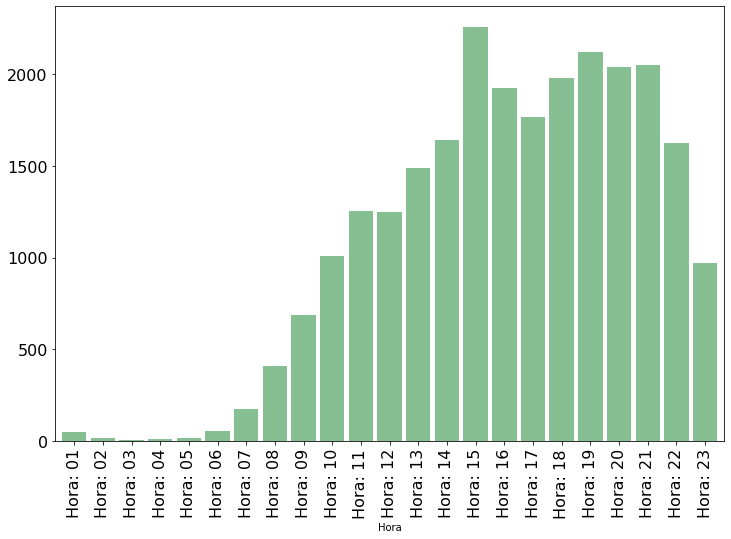

In [ ]:

#mybasket["GrupoIdade"].groupby(mybasket["GrupoIdade"]).count().plot(kind="bar", figsize=(12, 8), color='#86bf91', zorder=9, width=0.85,fontsize=16)
mybasket["Hora"].groupby(mybasket["Hora"]).count().plot(kind="bar", figsize=(12, 8), color='#86bf91', zorder=9, width=0.85,fontsize=16)

In [ ]:
mybasket["DiaDaSemana"].groupby(mybasket["DiaDaSemana"]).count().plot(kind="bar", figsize=(12, 8), color='#86bf91', zorder=9, width=0.85,fontsize=16)

In [ ]:
mybasket["Turno"].groupby(mybasket["Turno"]).count().plot(kind="bar", figsize=(12, 8), color='#86bf91', zorder=9, width=0.85,fontsize=16)

In [ ]:
myMBA = myretail.groupby(['Codigo','Item'])['Item'].last().unstack().reset_index().fillna('')

In [ ]:
myBasketHora = myretail.groupby(['Codigo','Hora','Item'])['Item'].last().unstack().reset_index().fillna('')

In [ ]:
myBasketTurno = myretail.groupby(['Codigo','Turno','Item'])['Item'].last().unstack().reset_index().fillna('')

In [ ]:
myBasketGrupoIdade = myretail.groupby(['Codigo','GrupoIdade','Item'])['Item'].last().unstack().reset_index().fillna('')

In [ ]:
myretail.to_excel('/content/drive/MyDrive/Colab Notebooks/Associations/Pedidos-SiteMercado.xlsx')

In [ ]:

mybasket = mybasket
transacoes = []

for i in range (0,len(mybasket.index)):
    transacoes.append([str(mybasket.values[i,j]) for j in range(0,len(mybasket.columns))])

for i in range(len(transacoes)):
    transacoes[i] = list(filter(retiraBrancos, transacoes[i]))


In [ ]:

l = transacoes

# open file
with open('/content/drive/MyDrive/Colab Notebooks/Associations/list.txt', 'w+') as f:

    # write elements of list
    for items in l:
        f.write('%s\n' %items)

    print("File written successfully")


# close the file
f.close()

File written successfully


#Data Mining

In [ ]:
regras = apriori(transacoes,min_support=0.002,min_confidence = 0.10,min_lift =1.2, min_length=2,max_length=2)
results = list(regras)

In [ ]:
regras2=apriori(transacoes,min_support=0.003,min_confidence = 0.4,min_lift =3.0, min_length=3,max_length=3)
results = list(regras2)

#Export Outcome

After all rules were generated, the file below was exported and imported into a Power BI report for analysis of the business area

In [ ]:
A=[]
B=[]
support = []
confidence = []
lift = []
totalTransacoes = len(mybasket)
supportQtde = []

for result in results:
  s =result[1]
  result_rules = result[2]
  for result_rule in result_rules:
    a = listToStringWithoutBrackets(list(result_rule[0]))
    b = listToStringWithoutBrackets(list(result_rule[1]))
    c = result_rule[2]
    l = result_rule[3]
    sp = len(mybasket) * s

    A.append(a)
    B.append(b)
    support.append(s * 100)
    confidence.append(c * 100)
    lift.append(l)
    supportQtde.append(sp)

rules_df = pd.DataFrame({
    'A':A,
    'B':B,
    'support':support,
    'confidence':confidence,
    'lift':lift,
    'supportQtde': supportQtde
})

rules_df = rules_df.sort_values(by = 'lift', ascending = False)
rules_df.to_excel('/content/drive/MyDrive/Colab Notebooks/Associations/MBA_Pedidos'+ datetime.today().strftime('%d-%m%-H:%M') +'.xlsx')
